In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import dash

from ipywidgets import interact, FloatSlider, Dropdown
from dash import html, dcc
from dash.dependencies import Input, Output
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error


In [2]:
df = pd.read_csv("/home/5b5f98d4-9ffe-434d-96e5-3a4b183d7036/archive.zip")
print("Shape:", df.shape)
df.head()

Shape: (2226382, 12)


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [3]:
df_sold = df[df["status"] == "sold"]
print("Shape:", df_sold.shape)
df_sold.head()

Shape: (812009, 12)


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
1414373,62066.0,sold,77500.0,3.0,1.0,NaN,1072625.0,Ponce,Puerto Rico,717.0,957.0,2021-11-29
1414374,72457.0,sold,524900.0,3.0,2.0,0.09,1850809.0,Aguada,Puerto Rico,602.0,2200.0,2021-12-13
1414375,48586.0,sold,175000.0,NaN,NaN,0.14,1139965.0,Aguadilla,Puerto Rico,603.0,3200.0,2021-11-29
1414376,61711.0,sold,90000.0,3.0,2.0,0.08,141421.0,Aguadilla,Puerto Rico,603.0,1421.0,2021-10-19
1414377,49592.0,sold,22500.0,2.0,1.0,0.32,1889894.0,Anasco,Puerto Rico,610.0,850.0,2021-12-30


In [4]:
df_sold.dropna(inplace=True)
print("Shape:", df_sold.shape)
df_sold.head()

Shape: (606926, 12)


/tmp/ipykernel_170/1474825249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sold.dropna(inplace=True)


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
1414374,72457.0,sold,524900.0,3.0,2.0,0.09,1850809.0,Aguada,Puerto Rico,602.0,2200.0,2021-12-13
1414376,61711.0,sold,90000.0,3.0,2.0,0.08,141421.0,Aguadilla,Puerto Rico,603.0,1421.0,2021-10-19
1414377,49592.0,sold,22500.0,2.0,1.0,0.32,1889894.0,Anasco,Puerto Rico,610.0,850.0,2021-12-30
1414378,72408.0,sold,168000.0,6.0,4.0,0.05,1157317.0,Anasco,Puerto Rico,610.0,3422.0,2021-10-21
1414379,60830.0,sold,200000.0,3.0,1.0,4.98,1855411.0,Arecibo,Puerto Rico,612.0,580.0,2022-03-16


In [5]:
df_new = df_sold[["price", "city", "state", "zip_code", "house_size", "acre_lot"]]
df_new.head()

,price,city,state,zip_code,house_size,acre_lot
1414374,524900.0,Aguada,Puerto Rico,602.0,2200.0,0.09
1414376,90000.0,Aguadilla,Puerto Rico,603.0,1421.0,0.08
1414377,22500.0,Anasco,Puerto Rico,610.0,850.0,0.32
1414378,168000.0,Anasco,Puerto Rico,610.0,3422.0,0.05
1414379,200000.0,Arecibo,Puerto Rico,612.0,580.0,4.98


In [6]:
sample_df = df_new.sample(n=6000, random_state=42)
print("SHAPE:", sample_df.shape)
sample_df.head()

SHAPE: (6000, 6)


,price,city,state,zip_code,house_size,acre_lot
2222471,435000.0,Mead,Washington,99021.0,2080.0,0.25
1863216,425000.0,West Chicago,Illinois,60185.0,3096.0,0.29
1681599,180000.0,Deltona,Florida,32738.0,870.0,0.23
1647384,157500.0,Lithonia,Georgia,30038.0,1416.0,0.10
1653453,324900.0,Monroe,Georgia,30655.0,1542.0,2.14


In [7]:
sample_df.reset_index(drop=True, inplace=True)
sample_df.head()

,price,city,state,zip_code,house_size,acre_lot
0,435000.0,Mead,Washington,99021.0,2080.0,0.25
1,425000.0,West Chicago,Illinois,60185.0,3096.0,0.29
2,180000.0,Deltona,Florida,32738.0,870.0,0.23
3,157500.0,Lithonia,Georgia,30038.0,1416.0,0.10
4,324900.0,Monroe,Georgia,30655.0,1542.0,2.14


In [8]:
sample_df["price_per_sqft"] = (sample_df["price"]/sample_df["house_size"]).round(1)
sample_df.head()

,price,city,state,zip_code,house_size,acre_lot,price_per_sqft
0,435000.0,Mead,Washington,99021.0,2080.0,0.25,209.1
1,425000.0,West Chicago,Illinois,60185.0,3096.0,0.29,137.3
2,180000.0,Deltona,Florida,32738.0,870.0,0.23,206.9
3,157500.0,Lithonia,Georgia,30038.0,1416.0,0.10,111.2
4,324900.0,Monroe,Georgia,30655.0,1542.0,2.14,210.7


In [9]:
P_Correlation = sample_df["house_size"].corr(sample_df["price"])
print("P_Correlation:", P_Correlation)

P_Correlation: 0.4803800865345183


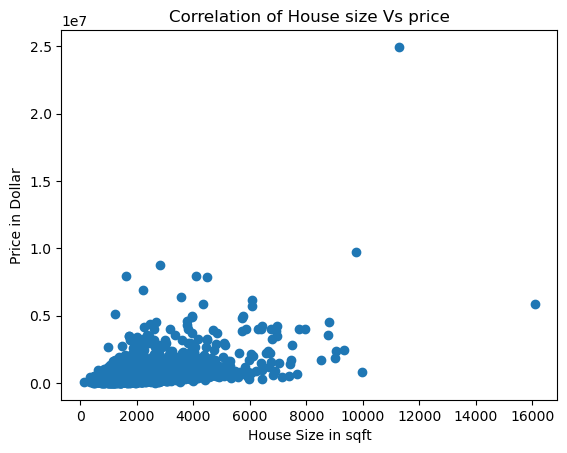

In [10]:
plt.scatter(
    x=sample_df["house_size"], y=sample_df["price"]
)
plt.xlabel("House Size in sqft"),
plt.ylabel("Price in Dollar")
plt.title("Correlation of House size Vs price");

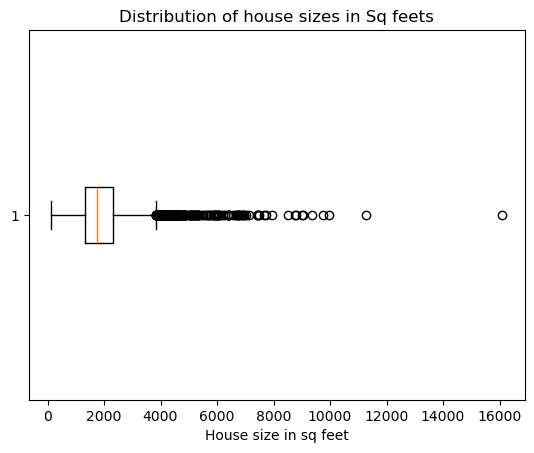

In [11]:
plt.boxplot(sample_df["house_size"], vert=False)
plt.xlabel("House size in sq feet")
plt.title("Distribution of house sizes in Sq feets");

In [12]:
P_Correlation_1 = sample_df["price"].corr(sample_df["price_per_sqft"])
print("P correlation of price Vs USD/ft2:", P_Correlation_1 )

P correlation of price Vs USD/ft2: 0.7106198404258582


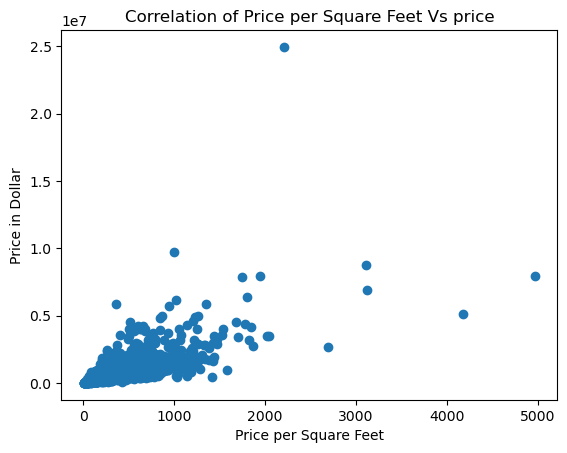

In [13]:
plt.scatter(
    x=sample_df["price_per_sqft"], y=sample_df["price"]
)
plt.xlabel("Price per Square Feet"),
plt.ylabel("Price in Dollar")
plt.title("Correlation of Price per Square Feet Vs price");

In [14]:
mean_per_by_state = sample_df.groupby("state")["price"].mean().sort_values(ascending=False).head(15)
mean_per_by_state

state
Utah                    1.950000e+06
District of Columbia    1.035097e+06
California              1.005016e+06
Hawaii                  7.950000e+05
Nevada                  7.069271e+05
Washington              6.763428e+05
Oregon                  6.617833e+05
Montana                 6.407000e+05
Massachusetts           6.079055e+05
Idaho                   5.815255e+05
Maryland                5.340822e+05
Virginia                5.164582e+05
Colorado                4.979332e+05
Puerto Rico             4.950000e+05
Arizona                 4.633927e+05
Name: price, dtype: float64

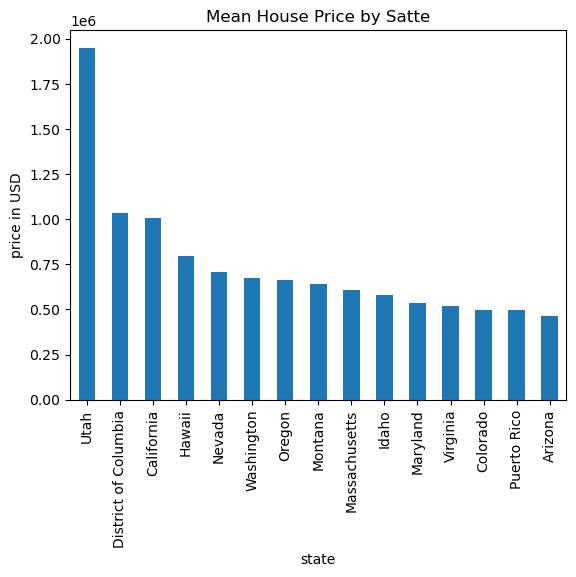

In [15]:
mean_per_by_state.plot(
    kind="bar",
    xlabel="state",
    ylabel="price in USD",
    title="Mean House Price by Satte"
);

In [16]:
mean_per_by_city = sample_df.groupby("city")["price"].mean().sort_values(ascending=False).head(15)
mean_per_by_city

city
Del Mar            8.800000e+06
Hereford           6.900000e+06
Ojai               6.375000e+06
Fossil             5.150000e+06
Beverly Hills      4.859167e+06
Menlo Park         4.646578e+06
Barnstable         4.580000e+06
Newport Beach      4.395000e+06
Treasure Island    3.999999e+06
Saratoga           3.999888e+06
La Jolla           3.995000e+06
Marco Island       3.950000e+06
Malibu             3.721750e+06
Pinecrest          3.700000e+06
North Hollywood    3.675000e+06
Name: price, dtype: float64

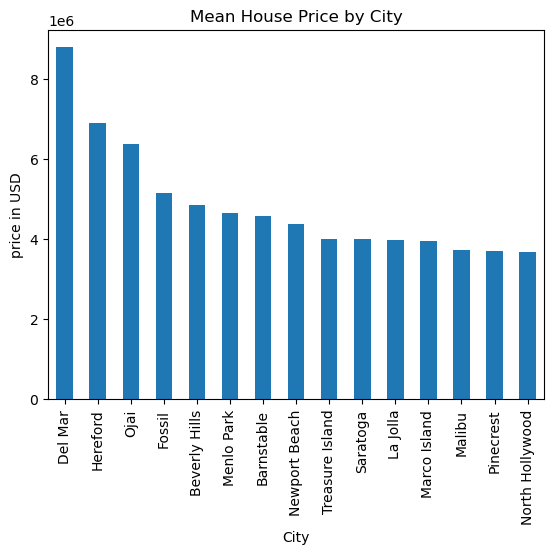

In [17]:
mean_per_by_city.plot(
    kind="bar",
    xlabel="City",
    ylabel="price in USD",
    title="Mean House Price by City"
);

In [18]:
mean_per_by_state_1 = sample_df.groupby("state")["price_per_sqft"].mean().sort_values(ascending=False).head(15)
mean_per_by_state

state
Utah                    1.950000e+06
District of Columbia    1.035097e+06
California              1.005016e+06
Hawaii                  7.950000e+05
Nevada                  7.069271e+05
Washington              6.763428e+05
Oregon                  6.617833e+05
Montana                 6.407000e+05
Massachusetts           6.079055e+05
Idaho                   5.815255e+05
Maryland                5.340822e+05
Virginia                5.164582e+05
Colorado                4.979332e+05
Puerto Rico             4.950000e+05
Arizona                 4.633927e+05
Name: price, dtype: float64

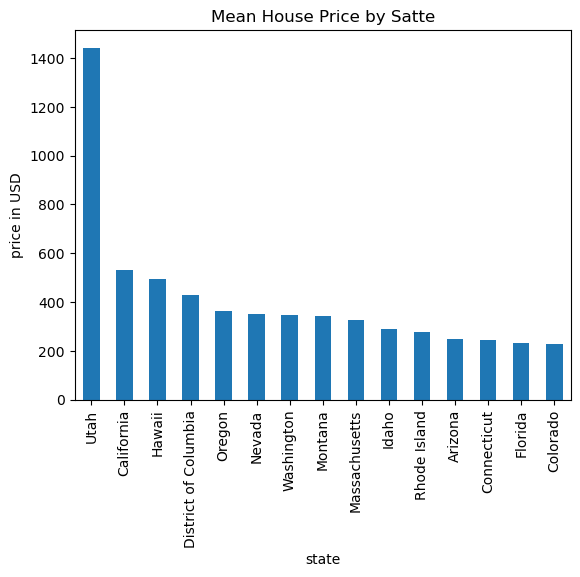

In [19]:
mean_per_by_state_1.plot(
    kind="bar",
    xlabel="state",
    ylabel="price in USD",
    title="Mean House Price by Satte"
);

In [20]:
mean_per_by_city_1 = sample_df.groupby("city")["price_per_sqft"].mean().sort_values(ascending=False).head(15)
mean_per_by_city

city
Del Mar            8.800000e+06
Hereford           6.900000e+06
Ojai               6.375000e+06
Fossil             5.150000e+06
Beverly Hills      4.859167e+06
Menlo Park         4.646578e+06
Barnstable         4.580000e+06
Newport Beach      4.395000e+06
Treasure Island    3.999999e+06
Saratoga           3.999888e+06
La Jolla           3.995000e+06
Marco Island       3.950000e+06
Malibu             3.721750e+06
Pinecrest          3.700000e+06
North Hollywood    3.675000e+06
Name: price, dtype: float64

In [21]:
sample_df.head()

,price,city,state,zip_code,house_size,acre_lot,price_per_sqft
0,435000.0,Mead,Washington,99021.0,2080.0,0.25,209.1
1,425000.0,West Chicago,Illinois,60185.0,3096.0,0.29,137.3
2,180000.0,Deltona,Florida,32738.0,870.0,0.23,206.9
3,157500.0,Lithonia,Georgia,30038.0,1416.0,0.10,111.2
4,324900.0,Monroe,Georgia,30655.0,1542.0,2.14,210.7


In [22]:
sample_df_1 = sample_df[sample_df["house_size"] <= 3800]
print("Shape:", sample_df_1.shape)
sample_df_1.head()

Shape: (5742, 7)


,price,city,state,zip_code,house_size,acre_lot,price_per_sqft
0,435000.0,Mead,Washington,99021.0,2080.0,0.25,209.1
1,425000.0,West Chicago,Illinois,60185.0,3096.0,0.29,137.3
2,180000.0,Deltona,Florida,32738.0,870.0,0.23,206.9
3,157500.0,Lithonia,Georgia,30038.0,1416.0,0.10,111.2
4,324900.0,Monroe,Georgia,30655.0,1542.0,2.14,210.7


In [23]:
sample_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5742 entries, 0 to 5999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           5742 non-null   float64
 1   city            5742 non-null   object 
 2   state           5742 non-null   object 
 3   zip_code        5742 non-null   float64
 4   house_size      5742 non-null   float64
 5   acre_lot        5742 non-null   float64
 6   price_per_sqft  5742 non-null   float64
dtypes: float64(5), object(2)
memory usage: 358.9+ KB


In [24]:
sample_df_1.select_dtypes("object").nunique()

city     2221
state      46
dtype: int64

In [25]:
sample_df_1.drop(columns=["city"], inplace=True)
sample_df_1.head()

/tmp/ipykernel_170/3724518644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df_1.drop(columns=["city"], inplace=True)


,price,state,zip_code,house_size,acre_lot,price_per_sqft
0,435000.0,Washington,99021.0,2080.0,0.25,209.1
1,425000.0,Illinois,60185.0,3096.0,0.29,137.3
2,180000.0,Florida,32738.0,870.0,0.23,206.9
3,157500.0,Georgia,30038.0,1416.0,0.10,111.2
4,324900.0,Georgia,30655.0,1542.0,2.14,210.7


In [26]:
Corr = sample_df_1.select_dtypes("number").drop(columns=["price"]).corr()

<Axes: >

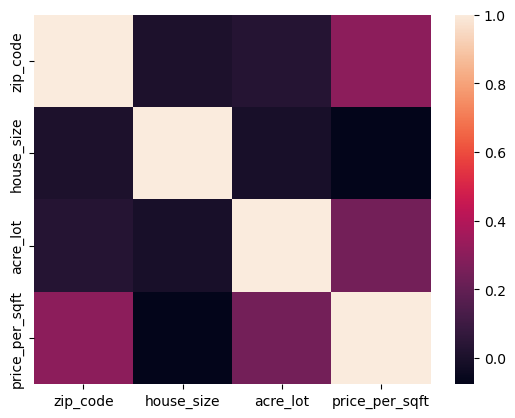

In [27]:
sns.heatmap(Corr)

In [28]:
target = sample_df_1["price"]
features = sample_df_1[["house_size", "state", "zip_code", "acre_lot"]]
X_train = features
y_train = target

In [29]:
# Baseline model
y_mean = y_train.mean().round(2)
y_pred_baseline = [y_mean]*len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print("mean House price:", (y_mean))
print("Baseline_MAE", (mae_baseline))

mean House price: 458767.67
Baseline_MAE 252700.84259839775


In [30]:
# Iterate
ohe = ce.OneHotEncoder(use_cat_names=True)
ohe.fit(X_train)
XT_train = ohe.transform(X_train)
print(XT_train.shape)
XT_train.head()

(5742, 49)


,house_size,state_Washington,state_Illinois,state_Florida,state_Georgia,state_Virginia,state_Arizona,state_Montana,state_Texas,state_California,...,state_Hawaii,state_Mississippi,state_Utah,state_South Dakota,state_Puerto Rico,state_Wyoming,state_North Dakota,state_Connecticut,zip_code,acre_lot
0,2080.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,99021.0,0.25
1,3096.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,60185.0,0.29
2,870.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,32738.0,0.23
3,1416.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,30038.0,0.10
4,1542.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,30655.0,2.14


In [31]:
imputer = SimpleImputer()
imputer.fit(XT_train)
XT_train = imputer.transform(XT_train)

In [32]:
model = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    Ridge()
)
model.fit(X_train, y_train)

,steps,"[('onehotencoder', ...), ('simpleimputer', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,verbose,0
,cols,['state']
,drop_invariant,False
,return_df,True
,handle_missing,'value'
,handle_unknown,'value'
,use_cat_names,True


In [33]:
y_predict_training = model.predict(X_train)

print("training MAE:", mean_absolute_error(y_train, y_predict_training))

training MAE: 164178.22734575253


In [34]:
def make_prediction (house_size, state, zip_code, acre_lot):
    data = {
        "house_size": house_size,
        "state": state,
        "zip_code": zip_code,
        "acre_lot": acre_lot
    }
    df_predict = pd.DataFrame(data, index=[0])
    prediction = model.predict(df_predict).round(2)
    return {"predicted house price": prediction}

In [36]:
interact(
    make_prediction,
    house_size = FloatSlider (
        min= X_train["house_size"].min(),
        max= X_train["house_size"].max(),
        step=0.001,
        value= X_train["house_size"].mean(),
    ),
    state = Dropdown(options=sorted(X_train["state"].unique())),
    zip_code = FloatSlider (
        min= X_train["zip_code"].min(),
        max= X_train["zip_code"].max(),
        step=0.001,
        value= X_train["zip_code"].mean(),
    ),
    
    acre_lot = FloatSlider (
        min= X_train["acre_lot"].min(),
        max= X_train["acre_lot"].max(),
        step=0.001,
        value= X_train["acre_lot"].mean(),
    ),
    
)

{'predicted house price': array([127196.45])}

interactive(children=(FloatSlider(value=1815.8786137234413, description='house_size', max=3800.0, min=128.0, s…

<function __main__.make_prediction(house_size, state, zip_code, acre_lot)>